# make figures fast sampling phase 

Inspiration: Tutorials - Explore SWOT Data

In [1]:
import os, sys
from glob import glob

import numpy as np
import pandas as pd
import xarray as xr
import datetime

import matplotlib.pyplot as plt
import cartopy
crs = cartopy.crs.PlateCarree()
import cartopy.feature as cfeature

import hvplot.xarray
#import hvplot.pandas

import pyinterp

import dask_jobqueue
import dask
from distributed import Client

In [ ]:
#ds = db.query(cycle_numbers=[478], pass_numbers=[3], group="left")

In [96]:
extent = [4.1362878, 6.5, 41.902277, 43.6241471] # med
center = [(extent[0]+extent[1])*.5, (extent[2]+extent[3])*.5,]
#cycles = list(range(474, 578))
pass_number = 3
cycle_number = 496

D = sd.load_l2_core("Unsmoothed", pass_number, cycle_number, extent=extent)

t = D["left"].time.mean().values
delta = pd.Timedelta("5d")
era5 = sd.load_era5(t-delta, t+delta, location=center)
"variables: "+" / ".join(list(ds))

'variables: time / time_tai / latitude_uncert / longitude_uncert / polarization_karin / ssh_karin_2 / ssh_karin_2_qual / ssh_karin_uncert / sig0_karin_2 / sig0_karin_2_qual / sig0_karin_uncert / total_coherence / mean_sea_surface_cnescls / miti_power_250m / miti_power_var_250m / ancillary_surface_classification_flag'

Text(0.5, 1.0, 'pass=3, cycle=496, t=2023-04-19T20:56:11.088502620')

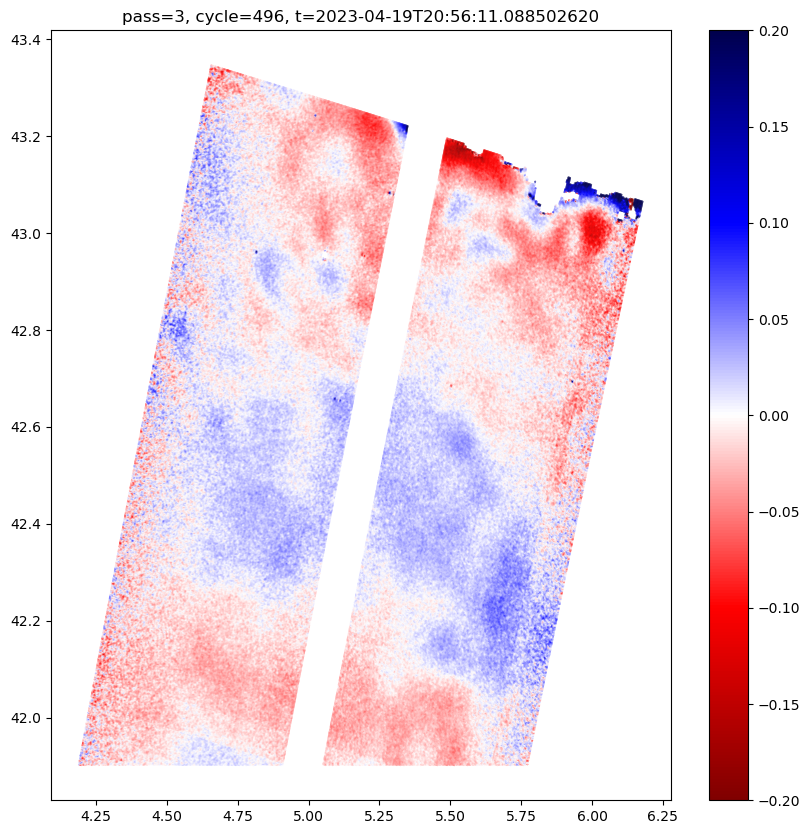

In [99]:
mask_threshold=1

fig, ax = plt.subplots(1,1, figsize=(10,10))

v, vmin, vmax, cmap = "ssh_karin_2", -.2, .2, "seismic_r"
#v, vmin, vmax, cmap = "sig0_karin_2", 0.5, None, "Greys_r"

for side, ds in D.items():

    da = ds[v]
    if v=="ssh_karin_2":
        da = da - ds["mean_sea_surface_cnescls"]
        da = da - da.median("num_lines") # in lieu of cross-over correction
    if v=="sig0_karin_2":
        da = np.log10(da)
    mask = (ds[v+"_qual"]<mask_threshold)
    da = da.where(mask)

    kwargs = dict(s=.1, vmin=vmin, vmax=vmax, cmap=cmap)
    im = ax.scatter(ds.longitude, ds.latitude, c=da, **kwargs)
    
fig.colorbar(im, ax=ax)
ax.set_title(f"pass={pass_number}, cycle={cycle_number}, t={t}")

Text(0.5, 1.0, '')

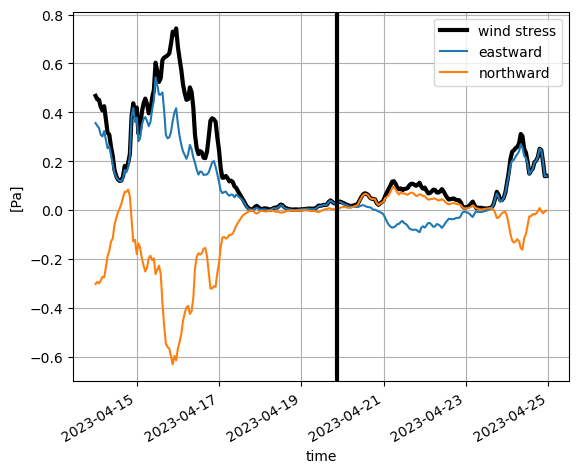

In [98]:
fig, ax = plt.subplots(1,1)
np.sqrt(era5["iews"]**2+era5["inss"]**2).plot(ax=ax, color="k", lw=3, label="wind stress")
era5["iews"].plot(ax=ax, label="eastward")
era5["inss"].plot(ax=ax, label="northward")
ax.axvline(t, color="k", lw=3)
ax.grid()
ax.legend()
ax.set_ylabel("[Pa]")
ax.set_title("")

In [2]:
# aviso tools
from ocean_tools.hpc.utilities import plot_polygon, plot_selection
import swot_calval.io
import swot_calval.natural_earth

In [4]:
sys.path.append("/work/HELPDESK_SWOTLR/swot_diego/libs")
import swot_diego as sd

In [17]:
sd.extent_masc

extent = sd.extent_masc
center = [(extent[0]+extent[1])*.5, (extent[2]+extent[3])*.5,]
#cycles = list(range(474, 578))
pass_number = 12
cycle_number = 505

D = sd.load_l2_core("Unsmoothed", pass_number, cycle_number, extent=extent)

t = D["left"].time.mean().values
delta = pd.Timedelta("10d")
era5 = sd.load_era5(t-delta, t+delta, location=center)
"variables: "+" / ".join(list(D["left"]))

'variables: time / time_tai / latitude_uncert / longitude_uncert / polarization_karin / ssh_karin_2 / ssh_karin_2_qual / ssh_karin_uncert / sig0_karin_2 / sig0_karin_2_qual / sig0_karin_uncert / total_coherence / mean_sea_surface_cnescls / miti_power_250m / miti_power_var_250m / ancillary_surface_classification_flag'

Text(0.5, 1.0, '')

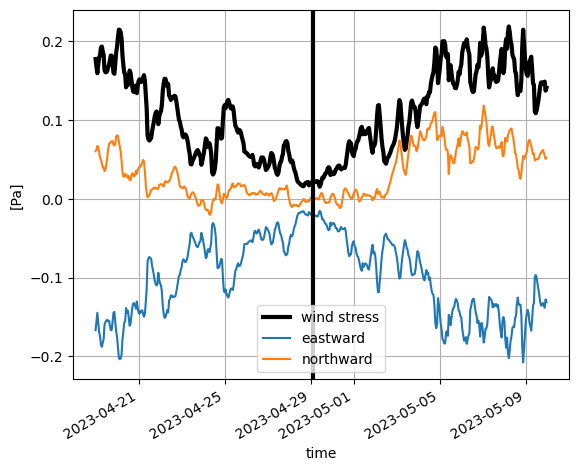

In [18]:
fig, ax = plt.subplots(1,1)
np.sqrt(era5["iews"]**2+era5["inss"]**2).plot(ax=ax, color="k", lw=3, label="wind stress")
era5["iews"].plot(ax=ax, label="eastward")
era5["inss"].plot(ax=ax, label="northward")
ax.axvline(t, color="k", lw=3)
ax.grid()
ax.legend()
ax.set_ylabel("[Pa]")
ax.set_title("")

Text(0.5, 1.0, 'pass=12, cycle=505, t=2023-04-29T03:03:35.060927744')

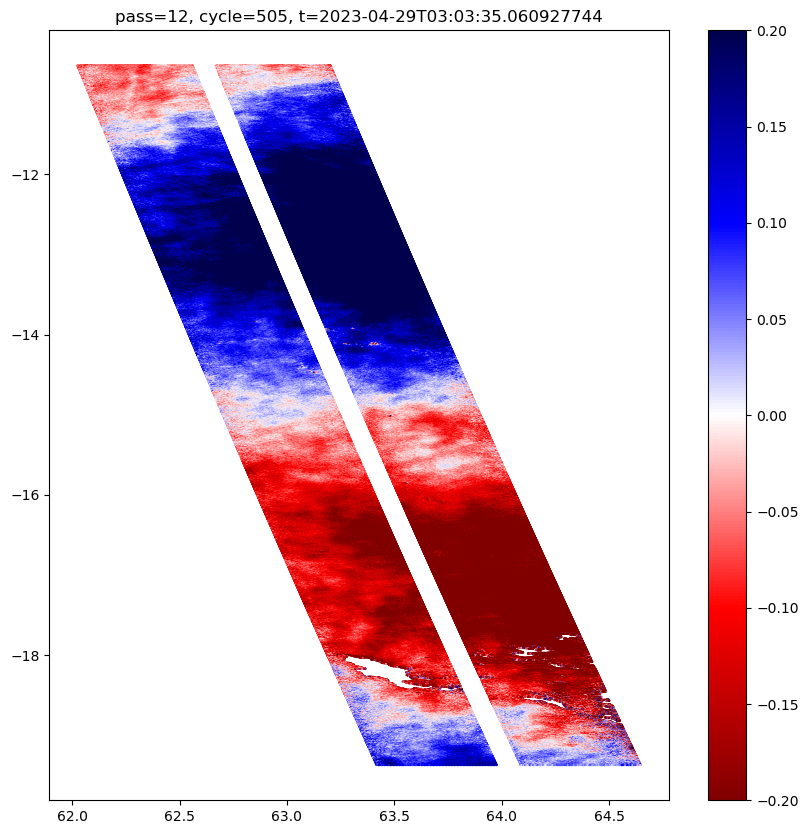

In [19]:
mask_threshold=1

fig, ax = plt.subplots(1,1, figsize=(10,10))

v, vmin, vmax, cmap = "ssh_karin_2", -.2, .2, "seismic_r"
#v, vmin, vmax, cmap = "sig0_karin_2", 0.5, None, "Greys_r"

for side, ds in D.items():

    da = ds[v]
    if v=="ssh_karin_2":
        da = da - ds["mean_sea_surface_cnescls"]
        da = da - da.median("num_lines") # in lieu of cross-over correction
    if v=="sig0_karin_2":
        da = np.log10(da)
    mask = (ds[v+"_qual"]<mask_threshold)
    da = da.where(mask)

    kwargs = dict(s=.1, vmin=vmin, vmax=vmax, cmap=cmap)
    im = ax.scatter(ds.longitude, ds.latitude, c=da, **kwargs)
    
fig.colorbar(im, ax=ax)
ax.set_title(f"pass={pass_number}, cycle={cycle_number}, t={t}")

/work/HELPDESK_SWOTLR/commun/envs/py311_dev/lib/python3.11/site-packages/xarray/core/computation.py:821: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


Text(0.5, 1.0, 'pass=12, cycle=505, t=2023-04-29T03:03:35.060927744')

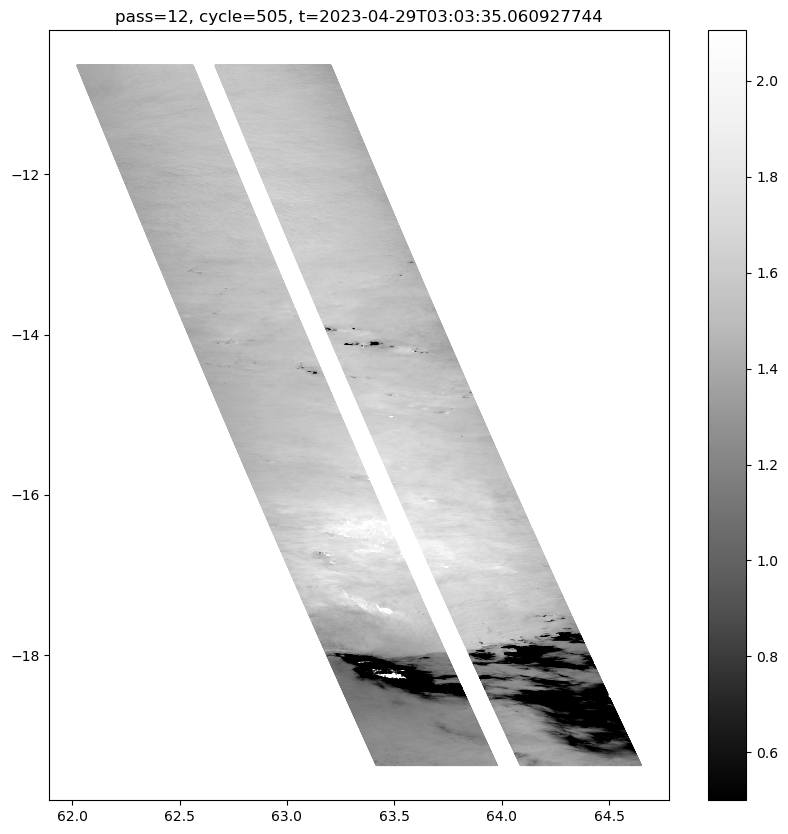

In [20]:
mask_threshold=1

fig, ax = plt.subplots(1,1, figsize=(10,10))

#v, vmin, vmax, cmap = "ssh_karin_2", -.2, .2, "seismic_r"
v, vmin, vmax, cmap = "sig0_karin_2", 0.5, None, "Greys_r"

for side, ds in D.items():

    da = ds[v]
    if v=="ssh_karin_2":
        da = da - ds["mean_sea_surface_cnescls"]
        da = da - da.median("num_lines") # in lieu of cross-over correction
    if v=="sig0_karin_2":
        da = np.log10(da)
    mask = (ds[v+"_qual"]<mask_threshold)
    da = da.where(mask)

    kwargs = dict(s=.1, vmin=vmin, vmax=vmax, cmap=cmap)
    im = ax.scatter(ds.longitude, ds.latitude, c=da, **kwargs)
    
fig.colorbar(im, ax=ax)
ax.set_title(f"pass={pass_number}, cycle={cycle_number}, t={t}")

## spin up cluster

In [3]:
from distributed import Client
import dask_jobqueue

cluster = dask_jobqueue.SLURMCluster(
    cores=1,
    memory="8GiB", # Balanced configuration should have 8 GiB per core if possible
    processes=1,
    log_directory=f"/work/scratch/data/{os.environ['USER']}/dask_stuff",
    walltime="01:00:00",
    interface="ib0",
    # Please fill your account, obtained  with the command $myaccounts
    account="swotce_guest",
    job_extra_directives=["--export=None"], # Do not propagate environment
)
cluster.scale(jobs=1)
client = Client(cluster)

client.wait_for_workers(1)

/work/HELPDESK_SWOTLR/commun/envs/py311_dev/lib/python3.11/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 42399 instead
  warnings.warn(



## open collection

In [ ]:
### L3
SWOT_DATA = '/work/HELPDESK_SWOTLR/commun/data/swot/L3_LR_SSH/v0.2/zcoll'
collection = swot_calval.io.open_collection(SWOT_DATA)
zds = collection.query()
zds

In [6]:
LATITUDE = 'latitude'
LONGITUDE = 'longitude'
TIME = 'time'
SSH = ['ssha_karin_2_filtered', 'mean_sea_surface_cnescls']
UV = ['speed_zonal_abs', 'speed_meridional_abs']

selection = [TIME, LONGITUDE, LATITUDE,]+SSH+UV

In [7]:
# inspect content
len(collection.variables())

53

In [8]:
list(collection.half_orbits())[:5]

[(405, 19), (405, 20), (405, 21), (405, 22), (405, 23)]

In [45]:
extent=None

#coordinates= sd.med_NW["coordinates"]
coordinates= sd.med_NW_CN["coordinates"]
polygon = pyinterp.geodetic.Polygon.from_geojson(coordinates)

In [46]:
def get_extent(coordinates):
    c=np.array(coordinates).squeeze()
    extent = [c[:,0].min(), c[:,0].max(), c[:,1].min(), c[:,1].max()]
    return extent

if extent is None:
    extent = get_extent(coordinates)

In [31]:
zds = collection.query(polygon=polygon,
                       cycle_numbers=507,
                       selected_variables=selection,
                      )
zds

<zcollection.dataset.Dataset>
  Dimensions: ('num_lines: 165', 'num_pixels: 69')
Data variables:
    ssha_karin_2_filtered    (num_lines, num_pixels)  float64: dask.array<chunksize=(165, 69)>                          
    speed_zonal_abs          (num_lines, num_pixels)  float64: dask.array<chunksize=(165, 69)>                          
    time                     (num_lines)  datetime64[ns]: dask.array<chunksize=(165,)>                                  
    latitude                 (num_lines, num_pixels)  float64: dask.array<chunksize=(165, 69)>                          
    speed_meridional_abs     (num_lines, num_pixels)  float64: dask.array<chunksize=(165, 69)>                          
    mean_sea_surface_cnescls (num_lines, num_pixels)  float64: dask.array<chunksize=(165, 69)>                          
    longitude                (num_lines, num_pixels)  float64: dask.array<chunksize=(165, 69)>                          

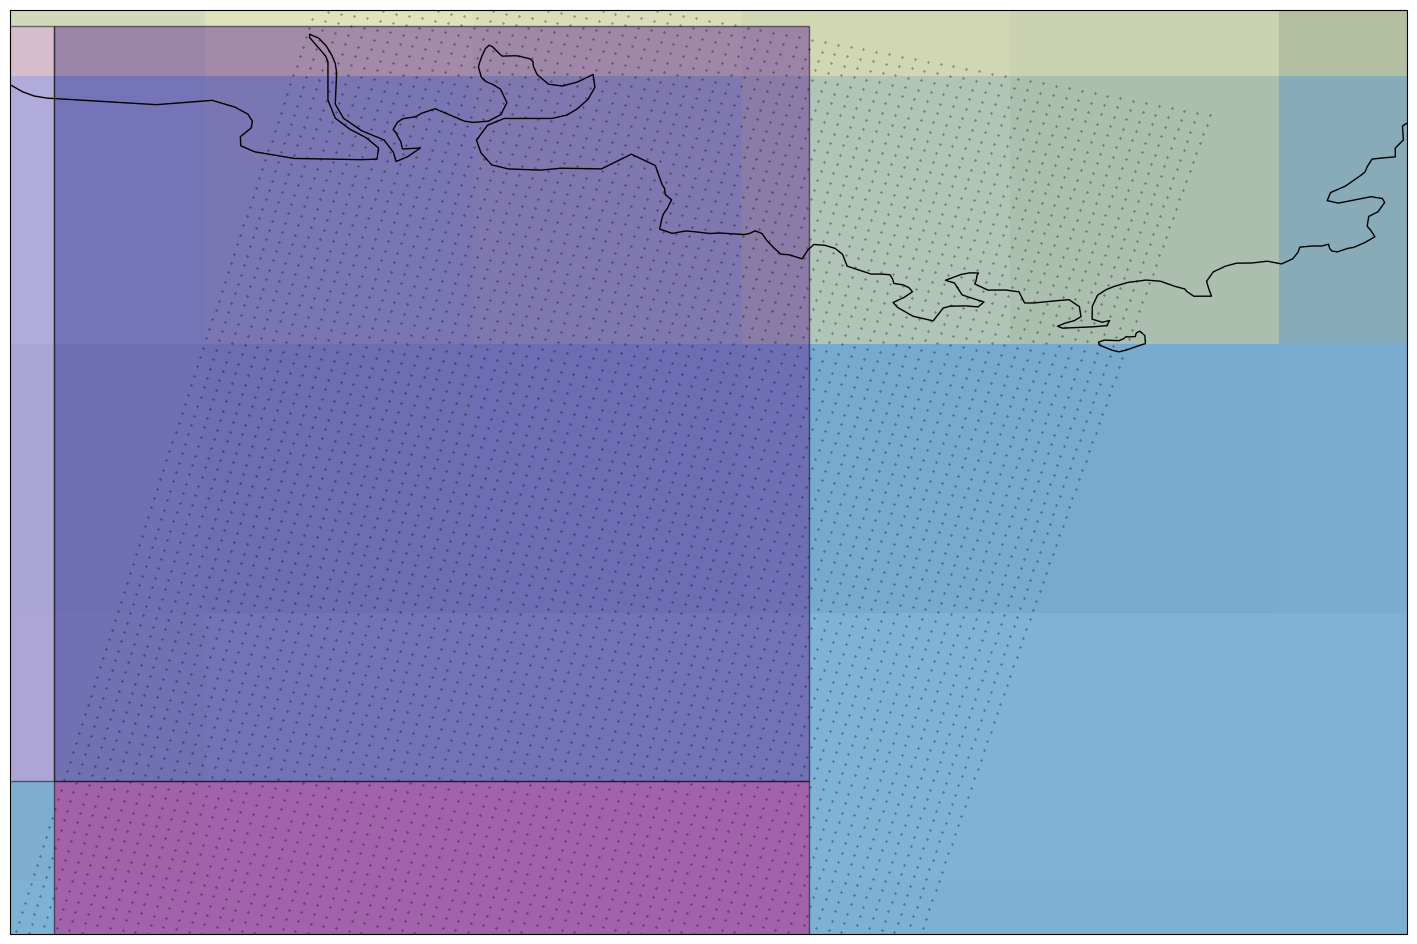

In [32]:
plot_selection(zds, LONGITUDE, LATITUDE, collection.geohash_indexer.precision, polygon, box=polygon.envelope())

In [53]:
# iterate over half orbits
half_orbits = collection.query_half_orbits(
    #first_day=datetime.date(2023, 5, 1), last_day=datetime.date(2023, 5, 3), # dev
    first_day=datetime.date(2023, 4, 1), last_day=datetime.date(2023, 7, 15), # prod
    selected_variables=[
        'cycle_number',
        'pass_number',
    ]+selection,
    polygon=polygon,
)
assert half_orbits is not None

In [54]:
tuple(half_orbits.keys())

((478, 3),
 (479, 3),
 (480, 3),
 (481, 3),
 (482, 3),
 (483, 3),
 (484, 3),
 (485, 3),
 (486, 3),
 (487, 3),
 (488, 3),
 (489, 3),
 (490, 3),
 (491, 3),
 (492, 3),
 (493, 3),
 (494, 3),
 (495, 3),
 (496, 3),
 (497, 3),
 (499, 3),
 (500, 3),
 (501, 3),
 (502, 3),
 (503, 3),
 (504, 3),
 (505, 3),
 (506, 3),
 (507, 3),
 (508, 3),
 (509, 3),
 (510, 3),
 (511, 3),
 (512, 3),
 (513, 3),
 (514, 3),
 (515, 3),
 (516, 3),
 (517, 3),
 (518, 3),
 (519, 3),
 (520, 3),
 (522, 3),
 (523, 3),
 (524, 3),
 (525, 3),
 (529, 3),
 (530, 3),
 (531, 3),
 (532, 3),
 (533, 3),
 (534, 3),
 (536, 3),
 (537, 3),
 (539, 3),
 (540, 3),
 (541, 3),
 (544, 3),
 (545, 3),
 (546, 3),
 (547, 3),
 (548, 3),
 (549, 3),
 (550, 3),
 (551, 3),
 (553, 3),
 (556, 3),
 (557, 3),
 (558, 3),
 (559, 3),
 (560, 3),
 (561, 3),
 (562, 3),
 (563, 3),
 (564, 3),
 (565, 3),
 (567, 3),
 (569, 3),
 (570, 3),
 (571, 3),
 (574, 3),
 (576, 3),
 (577, 3))

In [55]:
fig_dir = f"/work/scratch/data/{os.environ['USER']}/figs/"
print(fig_dir)

def draw_pass(
    cycle, pass_number, 
    ds, 
    v, vkwargs={},
    a=None, akwargs={},
    close=True,
):

    ds = ds.to_xarray()

    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(1, 1, 1, projection=crs)
    ax.set_extent(extent, crs=crs)

    #(ds["ssha"] + ds["mdt"]).rename("ssh")
    if isinstance(v, tuple):
        da = sum([ds[_v] for _v in v])
    elif instance(v, str):
        da = ds[v]
    
    kwargs = dict(
        x="longitude",
        y="latitude",
        ax=ax,
        transform=crs,
        extend="neither",
    )
    kwargs.update(vkwargs)
    da.plot(**kwargs)

    if a is not None:
        #ds["vel"] = np.sqrt(ds.ugos**2 + ds.vgos**2)
        #_ds = ds.where(ds.vel < 1)
        assert isinstance(a, tuple), "a must be a tuple"
        u, v = ds[a[0]], ds[a[1]]
        if len(a)>2 and a[2] is not None:
            vel = np.sqrt(u**2 + v**2)
            ds = ds.where(vel < a[2])
        kwargs=dict(transform=crs)
        kwargs.update(akwargs)
        q = ax.quiver(ds.longitude, ds.latitude, u, v, **kwargs)
        qk = plt.quiverkey(q, 0.9, 0.92, 1,
                           'velocity (1 m s$^{-1}$)',
                           labelpos='W',
                           transform=crs,
                           color='r',
        )

    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    ax.set_title(ds.time.dt.strftime("%Y/%d/%m %H:%M").values[0])

    fig.savefig(os.path.join(fig_dir, f"{cycle}_{pass_number}.png"))
    if close:
        plt.close(fig)
    

/work/scratch/data/pontea


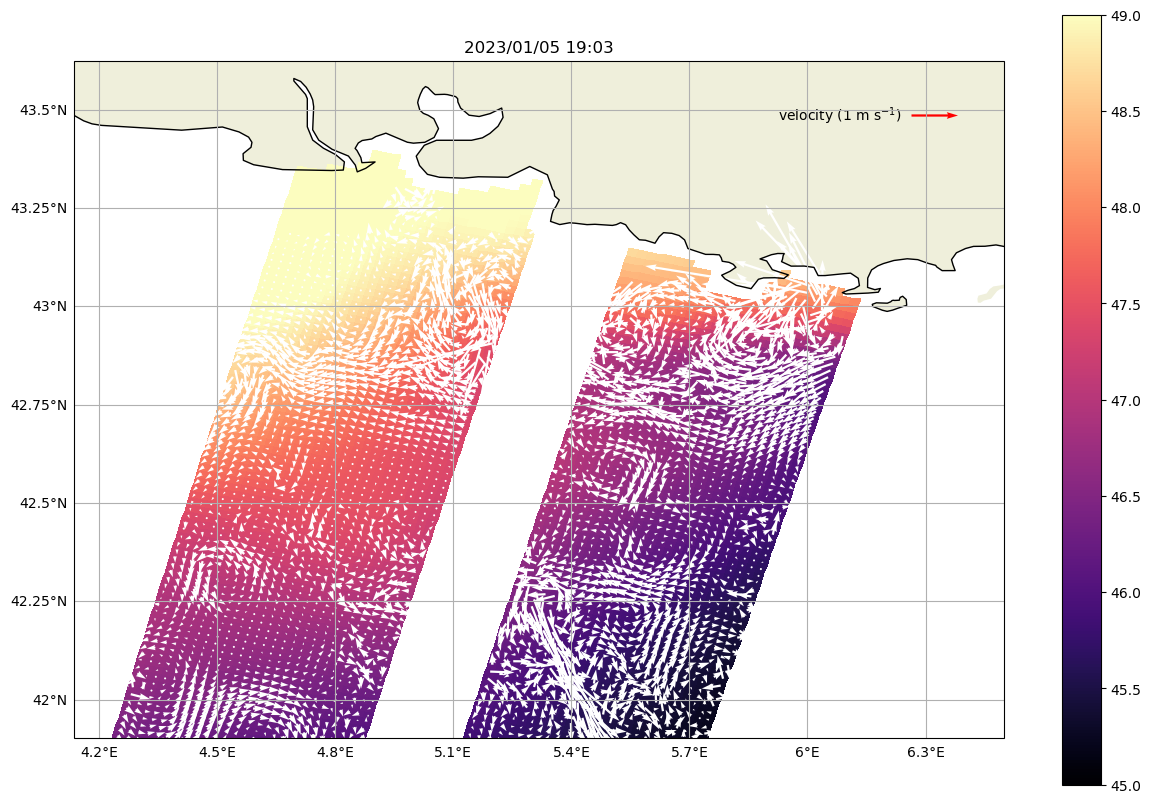

In [52]:
_iter = half_orbits.items()
(cycle, pass_number), ds = next(_iter)
#(cycle, pass_number), ds = next(_iter)

def wrap(cycle, pass_number, ds, close=True):    
    draw_pass(
        cycle, pass_number, ds, 
        ("ssha_karin_2_filtered", "mean_sea_surface_cnescls"), vkwargs=dict(vmin=45, vmax=49, cmap="magma"), 
        a=tuple(UV), akwargs=dict(color="w", scale=20),
        close=close,
    )
    
wrap(cycle, pass_number, ds, close=False)

In [56]:
for (cycle, pass_number), ds in half_orbits.items():
    print(cycle, pass_number, ds.dimensions)
    if pass_number==3:
        wrap(cycle, pass_number, ds)

478 3 {'num_lines': 165, 'num_pixels': 69}
479 3 {'num_lines': 165, 'num_pixels': 69}
480 3 {'num_lines': 165, 'num_pixels': 69}
481 3 {'num_lines': 165, 'num_pixels': 69}
482 3 {'num_lines': 165, 'num_pixels': 69}
483 3 {'num_lines': 165, 'num_pixels': 69}
484 3 {'num_lines': 165, 'num_pixels': 69}
485 3 {'num_lines': 165, 'num_pixels': 69}
486 3 {'num_lines': 165, 'num_pixels': 69}
487 3 {'num_lines': 165, 'num_pixels': 69}
488 3 {'num_lines': 165, 'num_pixels': 69}
489 3 {'num_lines': 165, 'num_pixels': 69}
490 3 {'num_lines': 165, 'num_pixels': 69}
491 3 {'num_lines': 165, 'num_pixels': 69}
492 3 {'num_lines': 165, 'num_pixels': 69}
493 3 {'num_lines': 165, 'num_pixels': 69}
494 3 {'num_lines': 165, 'num_pixels': 69}
495 3 {'num_lines': 165, 'num_pixels': 69}
496 3 {'num_lines': 165, 'num_pixels': 69}
497 3 {'num_lines': 165, 'num_pixels': 69}
499 3 {'num_lines': 165, 'num_pixels': 69}
500 3 {'num_lines': 165, 'num_pixels': 69}
501 3 {'num_lines': 165, 'num_pixels': 69}
502 3 {'num

---

## L2 

In [4]:
#ds = db.query(cycle_numbers=[478], pass_numbers=[3], group="left")

SWOT_L2_CACHE = "/work/HELPDESK_SWOTLR/commun/data/swot/cache/"

def load_l2_core(product_type, pass_number, cycle_number, extent=None):
    """ load one l2 pass cycle
    """
    
    files = sorted(glob(os.path.join(SWOT_L2_CACHE, f"SWOT_L2_LR_SSH_{product_type}_{pass_number}_{cycle_number}*.nc")))
    assert len(files)==1, f"more than one file matching:"+files
    file = files[0]
    
    left = xr.open_dataset(file, group="left")
    right = xr.open_dataset(file, group="right")
    
    if extent is not None:
        left = zoom_l2(left, extent)
        right = zoom_l2(right, extent)
        
    return dict(left=left, right=right)

#def get_available_cycles(pass_number):

def zoom_l2(ds, extent):
    
    #_ds = ds.isel(num_pixels=120, drop=True)
    _ds = ds
    lon, lat = _ds.longitude, _ds.latitude
    
    coords = list(ds.coords)
    ds = (
        ds.reset_coords()
        .where(
            (lon > extent[0])
            & (lon < extent[1])
            & (lat > extent[2])
            & (lat < extent[3]),
            drop=True,
        )
        .set_coords(coords)
    )
    return ds
    
    
# Visualise SWOT data
#import vador
#import vador.plugins as vplug

In [ ]:
def load_l2_cycle(cycle, extent=None):
    file = sorted(glob(os.path.join(SWOT_L2_CACHE, f"SWOT_L2_LR_SSH_Unsmoothed_{cycle}*.nc")))
    #print(file)
    assert len(file)==1, f"more than one file matching, check {SWOT_L2_CACHE}"

    left = xr.open_dataset(file[0], group="left")
    right = xr.open_dataset(file[0], group="right")
    
    if extent is not None:
        left = zoom(left, extent)
        right = zoom(right, extent)
        
    return dict(left=left, right=right)

In [5]:
extent = [4.1362878, 6.5, 41.902277, 43.6241471]
#ds = load_l2_cycle(480, extent=extent)
ds = load_l2_cycle(480)

fig, ax = plt.subplots(1,1)
ax.scatter(ds["left"].longitude, ds["left"].latitude, s=.1)
ax.scatter(ds["right"].longitude, ds["right"].latitude, s=.1)

AssertionError: more than one file matching, check /work/HELPDESK_SWOTLR/commun/data/swot/cache/

In [71]:
import pyproj

def fill_lonlat(ds):
    
    if isinstance(ds, dict):
        fill_lonlat(ds["left"])
        fill_lonlat(ds["right"])
        return

    lon_ref, lat_ref = (extent[0]+extent[1])*.5, (extent[2]+extent[3])*.5
    proj = pyproj.Proj(
                proj="aeqd",
                lat_0=lat_ref,
                lon_0=lon_ref,
                datum="WGS84",
                units="m",
            )
    
    lon, lat = ds["left"].longitude, ds["left"].latitude
    x, y = proj.transform(lon, lat)
    i, j = (lon.fillna(0.)*0+lon.num_lines).values, (lon.fillna(0.)*0+lon.num_pixels).values
    x, y, i, j = x.flatten(), y.flatten(), i.flatten(), j.flatten()
    i0, j0 = i, j
    missing = np.isnan(x)
    x, y, i, j = x[~missing], y[~missing], i[~missing], j[~missing]    
    
    # linear fit, not ideal
    X = np.vstack((i*0+1, i, j))
    X0 = np.vstack((i0*0+1, i0, j0))
    xf = (X0.T @ np.linalg.lstsq(X.T, x[:,None], rcond=None)[0]).reshape(lon.shape)
    yf = (X0.T @ np.linalg.lstsq(X.T, y[:,None], rcond=None)[0]).reshape(lon.shape)
    _inv_dir = pyproj.enums.TransformDirection.INVERSE
    lonf, latf = proj.transform(xf, yf, direction=_inv_dir)

    ds["longitude"] =  = lon.fillna(lonf)
    ds["latitude"] =  = lat.fillna(latf)


SyntaxError: invalid syntax (1059512345.py, line 35)

In [65]:
import pyinterp.backends.xarray
# Module that handles the filling of undefined values.
import pyinterp.fill

In [69]:
grid = pyinterp.backends.xarray.Grid2D(lon, geodetic=False)

ValueError: points must be a 1-dimensional array

In [68]:
pyinterp.backends.xarray.Grid2D?

Init signature:
pyinterp.backends.xarray.Grid2D(
    data_array: xarray.core.dataarray.DataArray,
    increasing_axes: bool = False,
    geodetic: bool = True,
)
Docstring:     
Builds a Grid2D from the Xarray data provided.

Args:
    data_array: Provided data
    increasing_axes: If this is true, check that the grid axes are
        increasing: the decreasing axes and the supplied grid will be
        flipped. Default to ``False``.
    geodetic: True, if the axes of the grid represent longitudes and
        latitudes. In this case, the constructor will try to determine
        the axes of longitudes and latitudes according to the value of
        the attribute ``units`` using the following algorithm:

        * if the axis unit is one of the values of the set ``degrees_east``,
          ``degree_east``, ``degree_E``, ``degrees_E``, ``degreeE`` or
          ``degreesE`` the axis
          represents a longitude,
        * if the axis unit is one of the values of the set
          ``de

In [66]:
lon

<xarray.DataArray 'longitude' (num_lines: 881, num_pixels: 238)>
array([[     nan,      nan,      nan, ..., 4.197346,      nan,      nan],
       [     nan,      nan,      nan, ..., 4.198011,      nan,      nan],
       [     nan,      nan,      nan, ..., 4.198677,      nan,      nan],
       ...,
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan]])
Coordinates:
    latitude   (num_lines, num_pixels) float64 nan nan nan 41.78 ... nan nan nan
    longitude  (num_lines, num_pixels) float64 nan nan nan 4.876 ... nan nan nan
Dimensions without coordinates: num_lines, num_pixels
Attributes:
    long_name:      longitude (degrees East)
    standard_name:  longitude
    units:          degrees_east
    quality_flag:   ssh_karin_2_qual
    valid_min:      0
    valid_max:      359999999
    comment:        Longitude of measurement. East longitude relative to Gree...

In [38]:
m.shape

(3, 1)

In [41]:
X.shape

(3, 202637)

(202637, 1)

Signature: np.linalg.lstsq(a, b, rcond='warn')
Docstring:
Return the least-squares solution to a linear matrix equation.

Computes the vector `x` that approximately solves the equation
``a @ x = b``. The equation may be under-, well-, or over-determined
(i.e., the number of linearly independent rows of `a` can be less than,
equal to, or greater than its number of linearly independent columns).
If `a` is square and of full rank, then `x` (but for round-off error)
is the "exact" solution of the equation. Else, `x` minimizes the
Euclidean 2-norm :math:`||b - ax||`. If there are multiple minimizing
solutions, the one with the smallest 2-norm :math:`||x||` is returned.

Parameters
----------
a : (M, N) array_like
    "Coefficient" matrix.
b : {(M,), (M, K)} array_like
    Ordinate or "dependent variable" values. If `b` is two-dimensional,
    the least-squares solution is calculated for each of the `K` columns
    of `b`.
rcond : float, optional
    Cut-off ratio for small singular values o

In [89]:
np.linalg.lstsq?

Signature: np.linalg.lstsq(a, b, rcond='warn')
Docstring:
Return the least-squares solution to a linear matrix equation.

Computes the vector `x` that approximately solves the equation
``a @ x = b``. The equation may be under-, well-, or over-determined
(i.e., the number of linearly independent rows of `a` can be less than,
equal to, or greater than its number of linearly independent columns).
If `a` is square and of full rank, then `x` (but for round-off error)
is the "exact" solution of the equation. Else, `x` minimizes the
Euclidean 2-norm :math:`||b - ax||`. If there are multiple minimizing
solutions, the one with the smallest 2-norm :math:`||x||` is returned.

Parameters
----------
a : (M, N) array_like
    "Coefficient" matrix.
b : {(M,), (M, K)} array_like
    Ordinate or "dependent variable" values. If `b` is two-dimensional,
    the least-squares solution is calculated for each of the `K` columns
    of `b`.
rcond : float, optional
    Cut-off ratio for small singular values o

In [76]:
np.hstack( x[~missing]

(202637,)

In [61]:
lon.shape

(881, 238)

In [59]:

#missing = np.isnan(y)
#Anew = A[~missing]

array([nan, nan, nan, ..., nan, nan, nan])

In [50]:
da.num_lines.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [46]:
da = ds["left"]["longitude"]
da

<xarray.DataArray 'longitude' (num_lines: 881, num_pixels: 238)>
array([[     nan,      nan,      nan, ..., 4.197346,      nan,      nan],
       [     nan,      nan,      nan, ..., 4.198011,      nan,      nan],
       [     nan,      nan,      nan, ..., 4.198677,      nan,      nan],
       ...,
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan]])
Coordinates:
    latitude   (num_lines, num_pixels) float64 nan nan nan 41.78 ... nan nan nan
    longitude  (num_lines, num_pixels) float64 nan nan nan 4.876 ... nan nan nan
Dimensions without coordinates: num_lines, num_pixels
Attributes:
    long_name:      longitude (degrees East)
    standard_name:  longitude
    units:          degrees_east
    quality_flag:   ssh_karin_2_qual
    valid_min:      0
    valid_max:      359999999
    comment:        Longitude of measurement. East longitude relative to Gree...

In [29]:
#da.interpolate_na(dim=["num_lines", "num_pixels"], fill_value="extrapolate")

Text(0, 0.5, '')

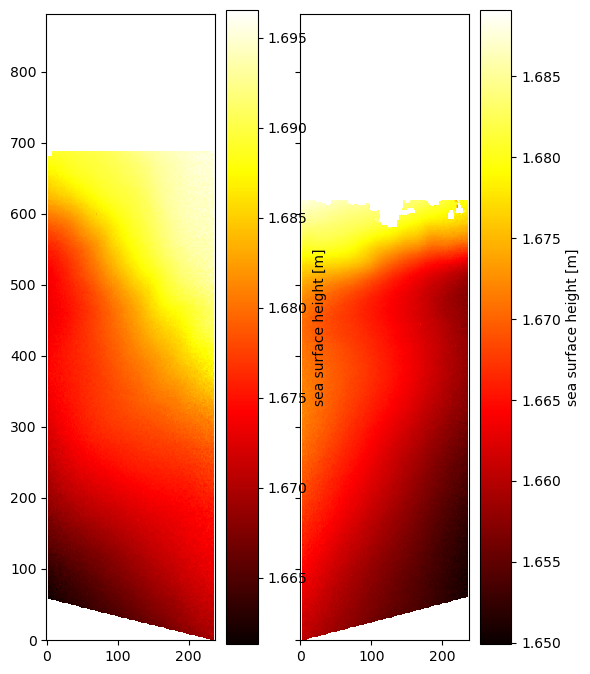

In [36]:
v, flag = "ssh_karin_2", 1
kwargs = dict(vmin=.8, vmax=1.5, cmap="Greys_r", add_colorbar=False)
kwargs = dict(cmap="hot")

#v = "sig0_karin_2"
#kwargs = dict(vmin=.8, vmax=1.5, cmap="Greys_r", add_colorbar=False)

fig, axes = plt.subplots(1,2, sharey=True, figsize=(6, 10))
#
ax = axes[0]
da = ds["left"][v]
if flag is not None:
    da = da.where(ds["left"][v+"_qual"]<=flag)
np.log10(da).plot(ax=ax, **kwargs)
ax.set_aspect("equal")
ax.set_xlabel("")
ax.set_ylabel("")
#
ax = axes[1]
da = ds["right"][v]
if flag is not None:
    da = da.where(ds["right"][v+"_qual"]<=flag)
np.log10(da).plot(ax=ax, **kwargs)
ax.set_aspect("equal")
ax.set_xlabel("")
ax.set_ylabel("")

In [37]:
ds["left"]

<xarray.Dataset>
Dimensions:                                (num_lines: 881, num_pixels: 238)
Coordinates:
    latitude                               (num_lines, num_pixels) float64 na...
    longitude                              (num_lines, num_pixels) float64 na...
Dimensions without coordinates: num_lines, num_pixels
Data variables: (12/16)
    time                                   (num_lines, num_pixels) datetime64[ns] ...
    time_tai                               (num_lines, num_pixels) datetime64[ns] ...
    latitude_uncert                        (num_lines, num_pixels) float32 na...
    longitude_uncert                       (num_lines, num_pixels) float32 na...
    polarization_karin                     (num_lines, num_pixels) object nan...
    ssh_karin_2                            (num_lines, num_pixels) float64 na...
    ...                                     ...
    sig0_karin_uncert                      (num_lines, num_pixels) float32 na...
    total_coherence                        (num_lines, num_pixels) float32 na...
    mean_sea_surface_cnescls               (num_lines, num_pixels) float64 na...
    miti_power_250m                        (num_lines, num_pixels) float32 na...
    miti_power_var_250m                    (num_lines, num_pixels) float32 na...
    ancillary_surface_classification_flag  (num_lines, num_pixels) float32 na...
Attributes:
    description:  Unsmoothed SSH measurement data and related information for...

In [6]:
#ds[v]

In [ ]:
np.log10(ds["right"]["sig0_karin_2"]).plot(vmin=0, cmap="Greys")

In [ ]:
# find groups

from netCDF4 import Dataset

def walktree(top):
    yield top.groups.values()
    for value in top.groups.values():
        yield from walktree(value)

rootgrp = Dataset(file, "r", format="NETCDF4")

print(rootgrp)

for children in walktree(rootgrp):
    for child in children:
        print(child)

---

## ERA5

In [23]:
#start, end = "2023/04/01", "2023/04/05"
start, end = "2023/03/01", "2023/07/15"

# global
#ds_glob = sd.load_era5(start, end)

# global
ds_med = sd.load_era5(start, end, extent=[4.1362878, 6.5, 41.902277, 43.6241471])
ds_med_loc = sd.load_era5(start, end, location=[5, 42.5])

In [24]:
#ds_glob.isel(time=0)["u10"].plot()

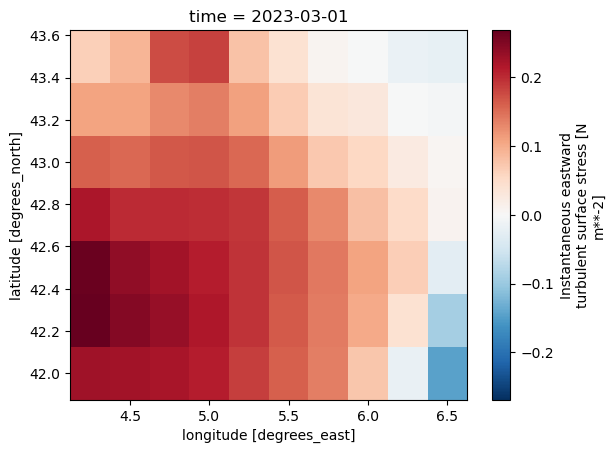

In [29]:
ds_med.isel(time=0)["iews"].plot()

In [28]:

(
    np.sqrt(ds_med_loc["iews"]**2+ds_med_loc["inss"]**2).rename("stress").hvplot(grid=True)
    *ds_med_loc["iews"].hvplot()
    *ds_med_loc["inss"].hvplot()
)

/work/HELPDESK_SWOTLR/commun/envs/py311_dev/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/work/HELPDESK_SWOTLR/commun/envs/py311_dev/lib/python3.11/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:Overlay
   .Curve.I   :Curve   [time]   (stress)
   .Curve.II  :Curve   [time]   (iews)
   .Curve.III :Curve   [time]   (inss)

---

In [ ]:
client.close()
cluster.close()